# Desafio 5

## Dataset: Contagiados COVID 19 - Temática: Salud 

#### Objetivo
Con los datos históricos que se posee acerca de los contagiados en la República Argentina, ¿hay indicios que demuestren que hay alguna correlación entre alguna de las variables y el fallecimiento de un contagiado?

#### Contexto del negocio
El año 2019 comenzaron los contagios de COVID-19, al momento que la misma se convirtió en un pandemia paso a ser un tema de suma importancia para los paises, apartir de ese instante se comenzó a llevar registro de los contagios, en el caso particular de la Argentina, toda esa información fue administrada por el gobierno nacional atraves de un sistema de carga de esa data. Dichos datos fueron disponibilizados para que el público en general pueda acceder y descargar los mismos.

#### Problema del negocio
A la información recavada por parte del gobierno nacional se la pretende poder utilizar para poder llevar a cabo la toma de decisiones estratégicas.

#### Contexto analítico
El dataset que es utilizado en el notebook tiene como temática la salud, el mismo fué descargado de https://www.datos.gob.ar que es el sitio oficial del gobierno de la República Argentina. Dentro del sitio luego de un análisis se decidio descargar la información de los contagiados de la Republica Argentina. Es un único archivo en formato CSV.

##### i) Abstract:
El dataset almacena el listado de los contagiados de COVID-19 en la República Argentina desde el 01/03/2020 hasta el 04/06/2022, dicho dataset tiene una cantidad de 105.916.221 registros de los cuales seleccione los primeros 100.000 registros por lo tanto hay variables como las fechas que solo muestran un periodo muy corto.

El dataset lleva el registro de los contagios de COVID-19 que se produjeron en Argentina, dentro de información de maneja se puede mencionar que posee 17 campos entre los que se destacan los siguientes:

- id_evento_caso = es el número de caso, debido a que solo trabajamos con una parte de datasets, no será información muy útil.
- sexo
- edad
- residencia_provincia_nombre = es la provincia de residencia de la persona, aquí hay que aclarar que Buenos Aires y CABA pertenecen a la misma provincia que es Buenos Aires, pero hacen la diferencia entre interior(Buenos Aires) y capital(CABA).
- origen_financiamiento = indica si el análisis clínico fue realizado en la parte pública o privada.
- residencia_departemento_nombre = me indica el departamento de residencia de la persona cargado; este es un campo que no se tiene mucho en cuenta por que tiene mucha información sucia, como datos sin especificar, valores ficticios, etc.
- Hay casos de datos de tipos fecha que tienen muchos registros no cargados, como fecha_inicio_sintomas o fecha de fallecimiento, en este último caso evidencian que son para las personas que no han fallecido por causas del COVID-19.





##### ii) Pregunta / Hipótesis
* Hay más mujeres que hombres que se contagiaron de covid en el periodo seleccionado.

* Se desea saber cómo es la proporción de contagios con respecto a las provincias.

##### iii) EDA

In [ ]:
import pandas as pd

# Librerías gráficas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1Y1XbymFFNfLCdTjDT64oIMVw1YE4x5TdlzK2eyCWoDM/export?format=csv&gid=1022416023'

df = pd.read_csv(url)

df.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,55.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2022-06-05
1,10000000,F,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2022-06-05
2,10000001,F,23.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2022-06-05
3,10000002,F,45.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2022-06-05
4,10000003,F,34.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2022-06-05


In [ ]:
df.shape

(100000, 25)

In [ ]:
df.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    100000 non-null  int64  
 1   sexo                              100000 non-null  object 
 2   edad                              99970 non-null   float64
 3   edad_años_meses                   100000 non-null  object 
 4   residencia_pais_nombre            100000 non-null  object 
 5   residencia_provincia_nombre       100000 non-null  object 
 6   residencia_departamento_nombre    100000 non-null  object 
 7   carga_provincia_nombre            100000 non-null  object 
 8   fecha_inicio_sintomas             36418 non-null   object 
 9   fecha_apertura                    100000 non-null  object 
 10  sepi_apertura                     100000 non-null  int64  
 11  fecha_internacion                 2658 non-null    ob

In [ ]:
df.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,1.000000e+05,99970.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,9.375346e+06,38.579594,14.669870,22.348080,23.366560,204.02063
std,2.373808e+06,17.447920,2.362236,28.592709,28.796844,253.71888
min,1.000000e+06,1.000000,14.000000,2.000000,2.000000,0.00000
25%,1.001848e+07,26.000000,14.000000,2.000000,6.000000,14.00000
50%,1.004438e+07,37.000000,14.000000,6.000000,6.000000,84.00000
75%,1.007070e+07,50.000000,14.000000,30.000000,34.000000,410.00000
max,1.009716e+07,222.000000,23.000000,94.000000,99.000000,882.00000


###### Proporción de contagios por sexo

In [ ]:
discriminado_por_sexo = df.groupby("sexo").count()

discriminado_por_sexo

,id_evento_caso,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
sexo,,,,,,,,,,,,,,,,,,,,,
F,52663,52662,52663,52663,52663,52663,52663,19292,52663,52663,...,260,52663,52663,52663,52663,52663,52663,49292,52663,52663
M,46595,46591,46595,46595,46595,46595,46595,16701,46595,46595,...,363,46595,46595,46595,46595,46595,46595,43769,46595,46595
NR,742,717,742,742,742,742,742,425,742,742,...,7,742,742,742,742,742,742,628,742,742


Text(0.5, 1.0, 'Contagiados por sexo')

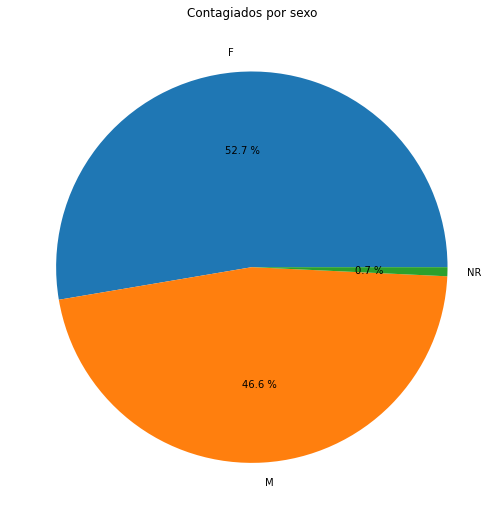

In [ ]:
discriminado_por_sexo_id = discriminado_por_sexo.id_evento_caso

fig, ax = plt.subplots(figsize=(14, 9))

ax.pie(discriminado_por_sexo_id.values, labels=discriminado_por_sexo_id.index, autopct="%0.1f %%")

plt.title('Contagiados por sexo')

###### Proporción de contagios por provincia de residencia




In [ ]:
total_por_provincia_todos = df.groupby("residencia_provincia_nombre").count()
total_por_provincia = total_por_provincia_todos.id_evento_caso

Text(0.5, 1.0, 'Cantidad de contagios por provincias')

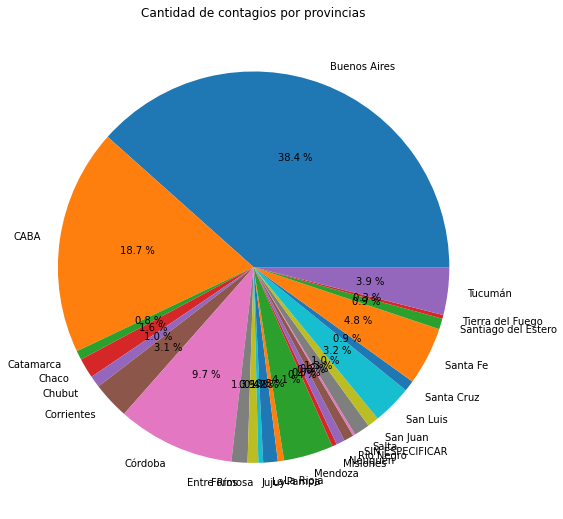

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))

ax.pie(total_por_provincia.values, labels=total_por_provincia.index, autopct="%0.1f %%")

plt.title('Cantidad de contagios por provincias')

###### Proporción de contagios por provincia de residencia(sólo las 15 provincias con mas contagios)

In [ ]:
total_por_provincia_15 = total_por_provincia_todos.sort_values('id_evento_caso', ascending=False)[:15]

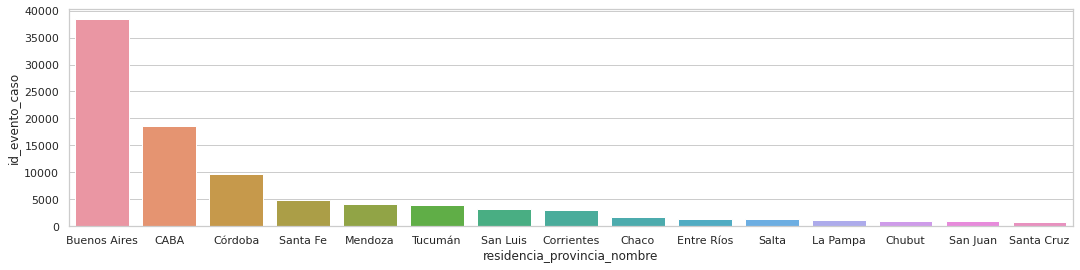

In [ ]:
sns.set_theme(style="whitegrid")

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

sns.barplot(x=total_por_provincia_15.index, y=total_por_provincia_15.id_evento_caso, data=total_por_provincia_10)

##### iv) Recomendaciones

Las recomendaciones a las que se llegan son la siguientes:

- Con respecto a la consulta planteada de saber si hay mayor cantidad de contagios según el sexo, del análisis se desprende los siguiente:
Existe una parte de los registros que no posee datos(NR) que es muy ínfima y su suma para algunas de las otras partes no afecta el análisis por lo tanto no la tenemos en cuenta. Si bien se evidencia un mayor porcentaje de varones contagiados ésta diferencia no es tan grande.

- De las dos últimas gráficas se observa el mismo fenómeno pero desde distintas perspectivas que Buenos Aires(suma de Buenos Aires y CABA) es por lejos que más registros tiene, esto es algo razonable ya que son las zonas más densamente pobladas de las nación. Para tener una mejor visión de los datos, en el gráfico de barras solo se eligen solo 15 provincias, ya que en el piechart al graficarlas a todas quedaba confusa la gráfica 

#### **Encoding de variables categóricas**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    100000 non-null  int64  
 1   sexo                              100000 non-null  object 
 2   edad                              99970 non-null   float64
 3   edad_años_meses                   100000 non-null  object 
 4   residencia_pais_nombre            100000 non-null  object 
 5   residencia_provincia_nombre       100000 non-null  object 
 6   residencia_departamento_nombre    100000 non-null  object 
 7   carga_provincia_nombre            100000 non-null  object 
 8   fecha_inicio_sintomas             36418 non-null   object 
 9   fecha_apertura                    100000 non-null  object 
 10  sepi_apertura                     100000 non-null  int64  
 11  fecha_internacion                 2658 non-null    ob

In [ ]:
df1 = df.copy()

# Codificación de variables con muchas categorías (Label Encoder): residencia_pais_nombre, residencia_provincia_nombre, residencia_departamento_nombre, carga_provincia_nombre, clasificacion, clasificacion_resumen
# Codificación de cada una de las variables que tienen muchas categorías y actualizo el valor en el DataFrame
df1['residencia_pais_nombre'] = encoder.fit_transform(df1['residencia_pais_nombre']).astype('int32')
df1['residencia_provincia_nombre'] = encoder.fit_transform(df1['residencia_provincia_nombre']).astype('int32')
df1['residencia_departamento_nombre'] = encoder.fit_transform(df1['residencia_departamento_nombre']).astype('int32')
df1['carga_provincia_nombre'] = encoder.fit_transform(df1['carga_provincia_nombre']).astype('int32')
df1['clasificacion'] = encoder.fit_transform(df1['clasificacion']).astype('int32')
df1['clasificacion_resumen'] = encoder.fit_transform(df1['clasificacion_resumen']).astype('int32')
df1['sexo'] = encoder.fit_transform(df1['sexo']).astype('int32')
df1['fallecido'] = encoder.fit_transform(df1['fallecido']).astype('int32')

# Codificación de variables con pocas categorías (One Hot Encoder): sepi_apertura, fallecido, asistencia_respiratoria_mecanica, origen_financiamiento, cuidado_intensivo, edad_años_meses
df1 = pd.get_dummies(df1, columns=['sepi_apertura', 'asistencia_respiratoria_mecanica', 'origen_financiamiento', 'cuidado_intensivo', 'edad_años_meses'])
# Eliminación de columnas contrastantes 
df1.drop(columns=['sepi_apertura_23', 'asistencia_respiratoria_mecanica_NO', 'origen_financiamiento_Privado', 'cuidado_intensivo_NO', 'edad_años_meses_Años'], inplace=True)  
# Eliminación de columnas con referencias a fechas
df1.drop(columns=['fecha_inicio_sintomas', 'fecha_apertura', 'fecha_internacion', 'fecha_cui_intensivo', 'fecha_fallecimiento', 'fecha_diagnostico', 'ultima_actualizacion'], inplace=True)  
# Eliminación la columna de número de evento que solo es un identificador del registro
df1.drop(columns=['id_evento_caso'], inplace=True)  

# Elimino los NaN de la columna edad y la casteo a int64
df1['edad'].fillna(value=df1['edad'].mean(), inplace=True)
df1["edad"] = df1['edad'].astype(np.int64)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   sexo                                 100000 non-null  int32
 1   edad                                 100000 non-null  int64
 2   residencia_pais_nombre               100000 non-null  int32
 3   residencia_provincia_nombre          100000 non-null  int32
 4   residencia_departamento_nombre       100000 non-null  int32
 5   carga_provincia_nombre               100000 non-null  int32
 6   fallecido                            100000 non-null  int32
 7   carga_provincia_id                   100000 non-null  int64
 8   clasificacion                        100000 non-null  int32
 9   clasificacion_resumen                100000 non-null  int32
 10  residencia_provincia_id              100000 non-null  int64
 11  residencia_departamento_id           100

#### **Balanceo de la variables de salida(Oversampling)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')  # Hacemos un oversampling para balancear la cantidad de datos target de stroke

X = df1.drop(['fallecido'], axis=1) 
y = df1['fallecido'] 

X_over, y_over = oversample.fit_resample(X, y) # Realizo el oversampling del dataset para balancear los datos

#### **Determinación de entrenamiento y de test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42) #hacemos el spliting de training y test

print(y_train.value_counts())
print(y_test.value_counts())

0    79603
1    79389
Name: fallecido, dtype: int64
1    19981
0    19767
Name: fallecido, dtype: int64


#### **Declaración del método de Feature Selection(Forward Selection) y ejecución del mismo**


In [ ]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        
        if(min_p_value < significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
            
    return best_features

In [ ]:
forward_selection(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:14

['asistencia_respiratoria_mecanica_SI',
 'edad',
 'cuidado_intensivo_SI',
 'clasificacion_resumen',
 'residencia_departamento_id',
 'sexo',
 'origen_financiamiento_Público',
 'residencia_pais_nombre',
 'residencia_departamento_nombre']

#### **Selección de los algoritmos a aplicar**
Como la variable target es categórica se debe seleccionar un algoritmo de clasificación

**Instalación e importación de librerias para graficar**

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libreria gráfica
import scikitplot as skplt

# Algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Métricas
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

**Primer algoritmo: KNN**

Accuracy: 0.9963268592130422


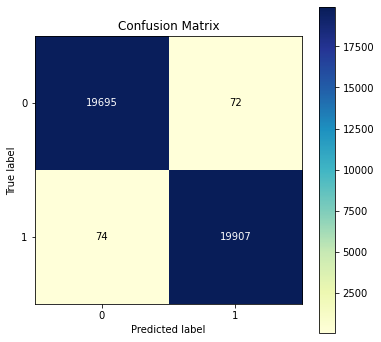

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)  
y_pred_knn = knn.predict(X_test) 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test, y_pred_knn))
#print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn)) 

**Segundo algoritmo: Random Forest**

Accuracy: 0.9994465130321022


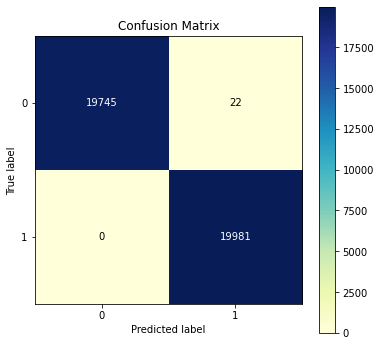

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train) 
y_pred_rf = rf.predict(X_test) 
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
#print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

**Tercer algoritmo: Decision Tree**

Accuracy: 0.8951896950789977


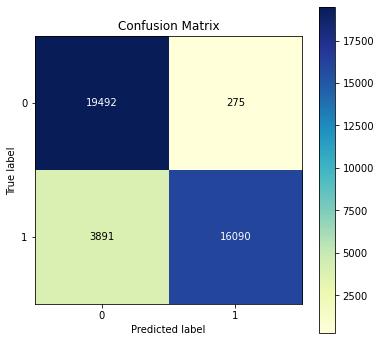

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test) 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
#print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc))

#### **Calculo las métricas para cada uno de los algoritmos**

**Métricas para KNN**

In [ ]:
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19767
           1       1.00      1.00      1.00     19981

    accuracy                           1.00     39748
   macro avg       1.00      1.00      1.00     39748
weighted avg       1.00      1.00      1.00     39748



**Métricas para Random Forest**

In [ ]:
print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19767
           1       1.00      1.00      1.00     19981

    accuracy                           1.00     39748
   macro avg       1.00      1.00      1.00     39748
weighted avg       1.00      1.00      1.00     39748



**Métricas para Decision Tree**

In [ ]:
print(classification_report(y_test, y_pred_dtc)) 

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     19767
           1       0.98      0.81      0.89     19981

    accuracy                           0.90     39748
   macro avg       0.91      0.90      0.89     39748
weighted avg       0.91      0.90      0.89     39748



#### **Concluciones y evaluaciones de los algoritmos seleccionados**

Como se puede observar de la métricas, los mejores resultados se los obtiene KNN y de Random Forest pero lo que llama la atención es que los mismos tiene un 100 % de probabilidad en todas las métricas, habria que revisar hasta que punto con menos variables siguen teniendo ese rendimiento, ya que podría darse un caso de overfitting. Para el caso de Arboles de desición se observa que el mismo tiene un rendimiento más pobre.